<a href="https://colab.research.google.com/github/farroshsy/LinearRegression_BigData/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Data Assignment for Linear Regression**
## Building A Linear Regression with PySpark and MLlib
---
Name: Farros Hilmi Syafei 
<br>
Student ID: 5025201012
<br>
Class: Big Data A
<br>
Lecturer: Abdul Munif, S.Kom., M.Sc.


## Source:
1.  https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a 


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=be142fb1efa01bc3dc69d0a3fe6adafe67e9666e95a87f1f2bbb8e32ea69c01c
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


## Load the data

In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)
house_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('./train.csv')
house_df.take(1)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


[Row(ID=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0)]

## Data exploration
Print Schema in a tree format.

In [ ]:
house_df.cache()
house_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [ ]:
house_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,333,250.95195195195194,147.8594378018597,1,506
crim,333,3.3603414714714708,7.352271836781104,0.00632,73.5341
zn,333,10.68918918918919,22.674761796618217,0.0,100.0
indus,333,11.29348348348346,6.998123104477312,0.74,27.74
chas,333,0.06006006006006006,0.2379556428164483,0,1
nox,333,0.557144144144145,0.11495450830289312,0.385,0.871
rm,333,6.265618618618616,0.7039515757334471,3.561,8.725
age,333,68.22642642642641,28.13334360562338,6.0,100.0
dis,333,3.7099336336336335,1.9811230514407001,1.1296,10.7103


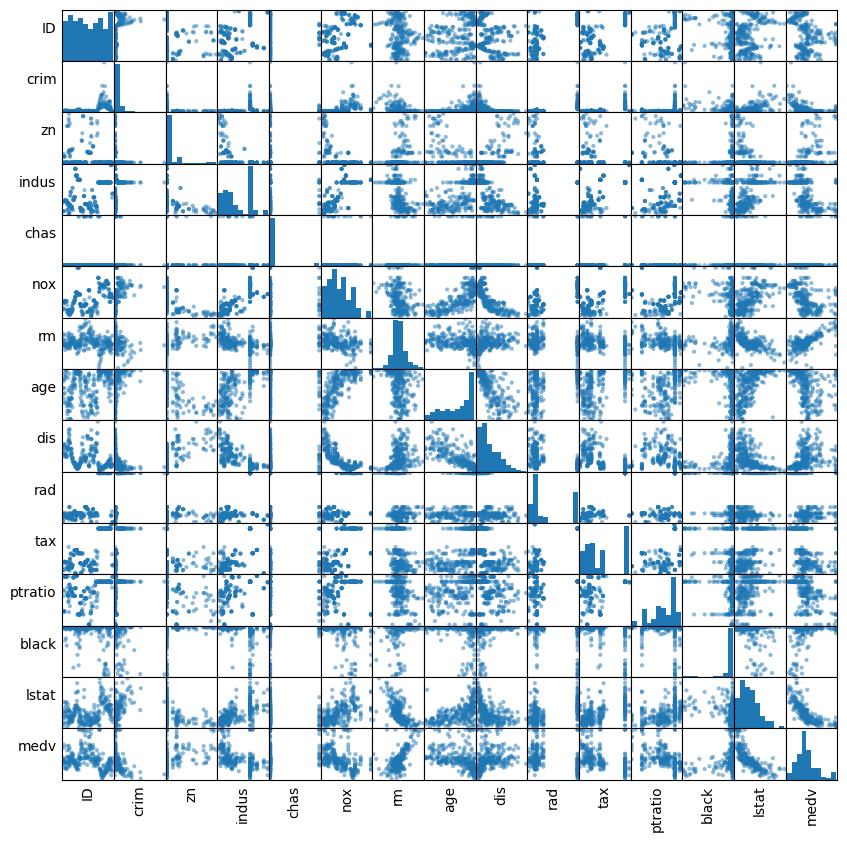

In [ ]:
import pandas as pd
numeric_features = [t[0] for t in house_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = house_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [ ]:
import six
for i in house_df.columns:
    if not( isinstance(house_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to MV for ", i, house_df.stat.corr('medv',i))

Correlation to MV for  ID -0.22169418651611697
Correlation to MV for  crim -0.4074543235732598
Correlation to MV for  zn 0.34484197569664277
Correlation to MV for  indus -0.47393197065920345
Correlation to MV for  chas 0.20438998859918733
Correlation to MV for  nox -0.4130541519920783
Correlation to MV for  rm 0.6895980892872156
Correlation to MV for  age -0.35888827406190227
Correlation to MV for  dis 0.24942226829396397
Correlation to MV for  rad -0.3522508242456341
Correlation to MV for  tax -0.44807769440070433
Correlation to MV for  ptratio -0.48137595552491735
Correlation to MV for  black 0.33665955532155767
Correlation to MV for  lstat -0.7386000348786346
Correlation to MV for  medv 1.0


The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median value tends to go up when the number of rooms goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; the median value tends to go down when the percentage of the lower status of the population goes up. Finally, coefficients close to zero mean that there is no linear correlation.

In [ ]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(house_df)
vhouse_df = vhouse_df.select(['features', 'medv'])
vhouse_df.show(3)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.03237,0.0,2.18...|33.4|
+--------------------+----+
only showing top 3 rows



In [ ]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

## Linear Regression

In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='medv', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.019456797467856873,-0.018352774290048158,4.858817902591169,-1.6907015654372186,4.482962538797138,-1.470765371454875e-05,-0.6910551787351693,-0.0,0.0,-0.5909399244419951,0.010725408534469428,-0.6113660083264326]
Intercept: 12.6947842045637


In [ ]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.568825
r2: 0.760236


In [ ]:
train_df.describe().show()

+-------+------------------+
|summary|              medv|
+-------+------------------+
|  count|               231|
|   mean|23.204761904761916|
| stddev| 9.350932239483503|
|    min|               5.0|
|    max|              50.0|
+-------+------------------+



In [ ]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","medv","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="medv",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 30.95701159339222|35.4|[0.01311,90.0,1.2...|
|27.941769068017727|24.5|[0.01501,80.0,2.0...|
|31.886877275161797|32.9|[0.01778,95.0,1.4...|
| 31.24158007663961|31.1|[0.02187,60.0,2.9...|
| 29.99663385637326|30.8|[0.02763,75.0,2.9...|
+------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.563412


In [ ]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 5.73498


In [ ]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.5, 0.43269654264736795, 0.22360239945932736, 0.19642527438534038, 0.16459724445399193, 0.16092410476517138, 0.15967382046488837, 0.15881273516125352, 0.15795417816876942, 0.15760652734245229, 0.15701975472569107]
+--------------------+
|           residuals|
+--------------------+
|  -6.912049362614795|
|   1.366778093519411|
|  -5.104882159557786|
|  0.7848052288903098|
|  1.4360226536299514|
|3.347803473552346...|
| -1.4813838660598861|
|   5.670762562317471|
| -3.5022098489052524|
|   6.916310936939375|
| -0.1190920544725742|
|   9.989417624829947|
|  -1.713001642725807|
|  -9.769456848900457|
|  -4.499889316264117|
| -3.6737915817456965|
|  -2.188091007444733|
|-0.09458578615846847|
|  1.0330451446102522|
| -2.0740998280355853|
+--------------------+
only showing top 20 rows



In [ ]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","medv","features").show()

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 30.95701159339222|35.4|[0.01311,90.0,1.2...|
|27.941769068017727|24.5|[0.01501,80.0,2.0...|
|31.886877275161797|32.9|[0.01778,95.0,1.4...|
| 31.24158007663961|31.1|[0.02187,60.0,2.9...|
| 29.99663385637326|30.8|[0.02763,75.0,2.9...|
|30.446792689487705|33.4|[0.03237,0.0,2.18...|
|27.845684921147768|24.1|[0.03445,82.5,2.0...|
| 31.56189631829369|28.5|[0.03502,80.0,4.9...|
| 24.65588851984841|22.9|[0.03551,25.0,4.8...|
| 24.72123680847173|20.6|[0.04294,28.0,15....|
|23.493221944380952|20.5|[0.04337,21.0,5.6...|
| 26.91265494699335|23.9|[0.04462,25.0,4.8...|
|23.656850427774792|20.6|[0.04527,0.0,11.9...|
|31.439757632552844|30.3|[0.04666,80.0,1.5...|
| 23.83665820651964|11.9|[0.04741,0.0,11.9...|
| 23.61211862106864|23.4|[0.04981,21.0,5.6...|
|21.598412588414195|19.0|[0.05497,0.0,5.19...|
| 35.69084935991715|50.0|[0.05602,0.0,2.46...|
|36.634269449

## Decision Tree Regression

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'medv')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.37084


**Feature Importance**


In [ ]:
dt_model.featureImportances

SparseVector(13, {0: 0.0403, 1: 0.0, 3: 0.0032, 4: 0.0078, 5: 0.5843, 6: 0.0071, 7: 0.0361, 8: 0.0022, 9: 0.0144, 10: 0.0276, 12: 0.277})

In [ ]:
house_df.take(1)

[Row(ID=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0)]

Apparently, the number of rooms is the most important feature to predict the house median price in our data.

## Gradient-Boosted Tree Regression

In [ ]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'medv', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'medv', 'features').show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|35.589357321800534|35.4|[0.01311,90.0,1.2...|
|25.732375238222172|24.5|[0.01501,80.0,2.0...|
| 33.84390348911159|32.9|[0.01778,95.0,1.4...|
|25.188606777118814|31.1|[0.02187,60.0,2.9...|
|  27.0856075704276|30.8|[0.02763,75.0,2.9...|
+------------------+----+--------------------+
only showing top 5 rows



In [ ]:
gbt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.05056


## Summary

Gradient-boosted tree regression performed the best on our data.